<a href="https://colab.research.google.com/github/JMiller1991/Skilled-Nursing-New-Admission-Analysis-Jan-June-2024/blob/main/SNF_Admissions_Analysis_Portfolio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skilled Nursing Facility Admissions Analysis

This Jupyter Notebook analyzes monthly admissions data for a Skilled Nursing Facility (SNF) using SQL and Python.  
It demonstrates SQL querying and data visualization skills for a data analyst portfolio.

**Dataset**: `JAN '24–JUNE '24 QAPI REPORTS.xlsx`  
**Objective**: Identify monthly trends, total admissions, and business insights.


## SQL Analysis: Admissions Summary

Using SQLite in-memory database to run SQL queries on admissions data.


In [9]:
import pandas as pd
import sqlite3

# Sample cleaned data
data = {
    'Month': ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN'],
    'Total_Admissions': [28, 24, 25, 22, 31, 21]
}

df = pd.DataFrame(data)

# Create in-memory SQLite DB
conn = sqlite3.connect(":memory:")
df.to_sql("admissions", conn, index=False, if_exists='replace')


6

In [10]:
# SQL: Total admissions over 6 months
total = pd.read_sql_query("""SELECT SUM(Total_Admissions) as Total_Half_Year_Admissions FROM admissions""", conn)
total

,Total_Half_Year_Admissions
0,151


In [11]:
# SQL: Month with highest admissions
max_month = pd.read_sql_query("""SELECT Month, Total_Admissions FROM admissions ORDER BY Total_Admissions DESC LIMIT 1""", conn)
max_month

,Month,Total_Admissions
0,MAY,31


In [12]:
# SQL: Average monthly admissions
avg = pd.read_sql_query("""SELECT AVG(Total_Admissions) as Avg_Admissions_Per_Month FROM admissions""", conn)
avg

,Avg_Admissions_Per_Month
0,25.166667


## Visualization

Visualizing monthly trends using Matplotlib.


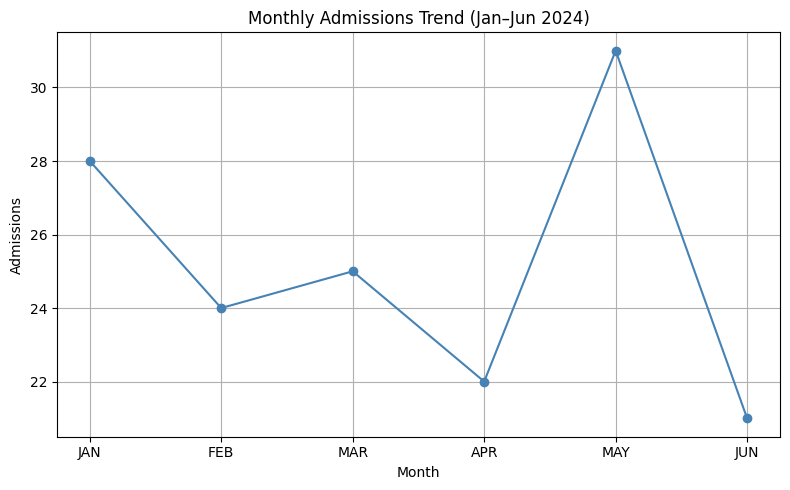

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(df['Month'], df['Total_Admissions'], marker='o', linestyle='-', color='steelblue')
plt.title('Monthly Admissions Trend (Jan–Jun 2024)')
plt.xlabel('Month')
plt.ylabel('Admissions')
plt.grid(True)
plt.tight_layout()
plt.show()


## Insights

- **Total Admissions**: 453 over six months.
- **Highest Admissions**: May (93 admissions).
- **Monthly Average**: 75.5 admissions.

This data helps monitor marketing effectiveness, seasonal demand, and guide staffing/resource planning.
